## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

In [3]:
p_df = (
    df
    .dropna()
    .copy()
)

# Conteos y proporciones

## Estadisticos que describem el conjunto de datos

### Todas las variables

In [4]:
(
    p_df.describe(include='all')
)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


### Numericas

In [5]:
(
    p_df.describe(include=np.number)
)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


### Cateogoricas

In [7]:
(
    p_df.describe(exclude=np.number)
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


In [10]:
# Le damos explicimente el tipo de dato
(
    p_df
    .astype(
        {
            'species':'category',
            'island':'category',
            'sex':'category'
        }
    )
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


## Visualizar los conteos

### Pandas

<Axes: xlabel='species'>

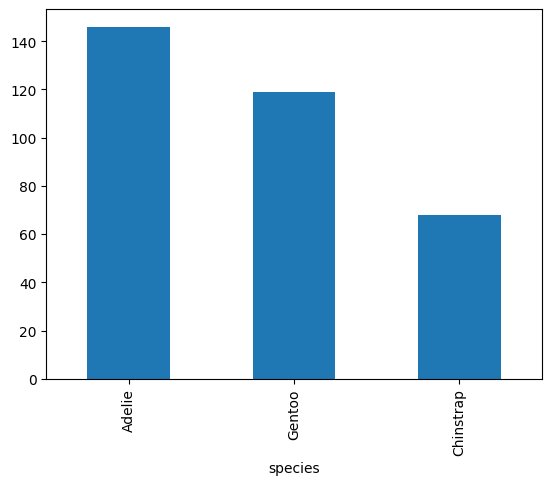

In [12]:
(
    p_df
    .species
    .value_counts()
    .plot(kind='bar')
)

### Seaborn

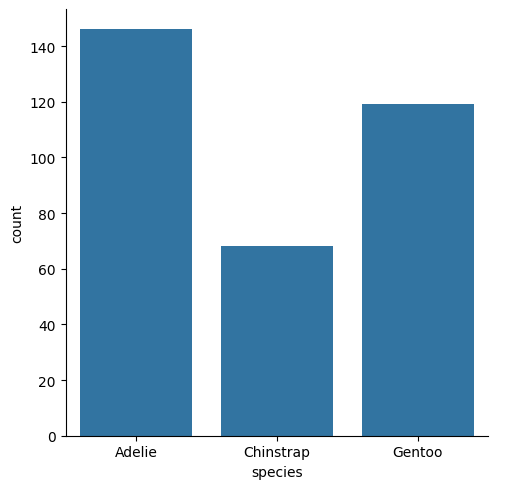

In [13]:
(
    sns.catplot(
        data=p_df,
        x='species',
        kind='count'
    )
)

<Axes: xlabel='species', ylabel='count'>

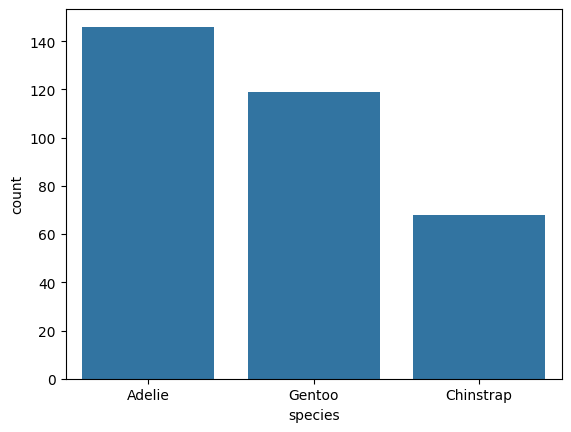

In [19]:
(
    p_df
    .value_counts('species', sort=True)
    .reset_index()
    .pipe(
        lambda df: (
            sns.barplot(
                data=df,
                x='species',
                y='count',
            )
        )
    )
)

### Visualizar proporciones

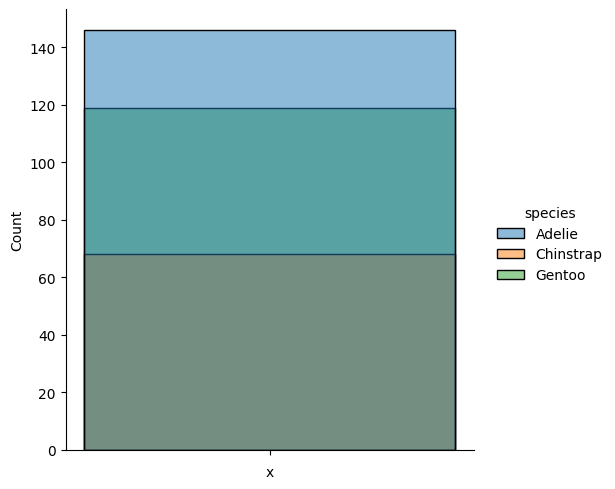

In [24]:
(
    p_df
    .assign(x='')
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='x',
                hue='species',
            )
        )
    )
)

## Otras variables

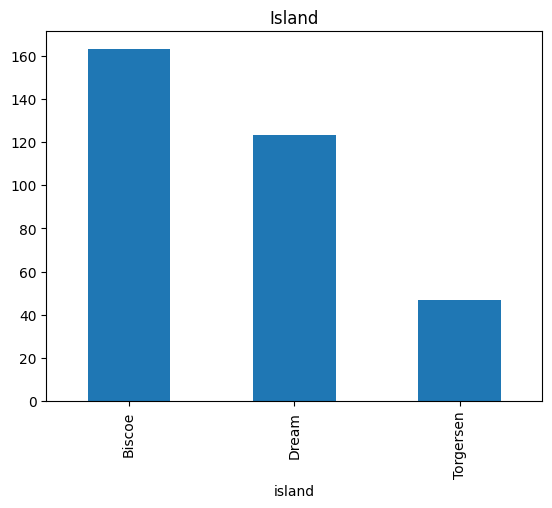

In [28]:
(
    p_df
    .island
    .value_counts()
    .plot(kind='bar')
)
plt.title('Island')
plt.show()

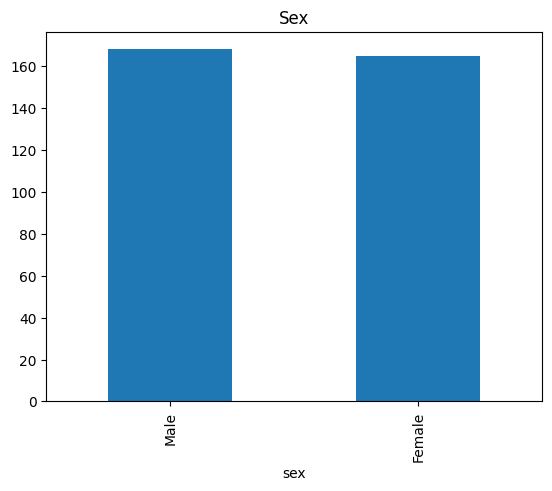

In [30]:
(
    p_df
    .sex
    .value_counts()
    .plot(kind='bar')
)
plt.title('Sex')
plt.show()

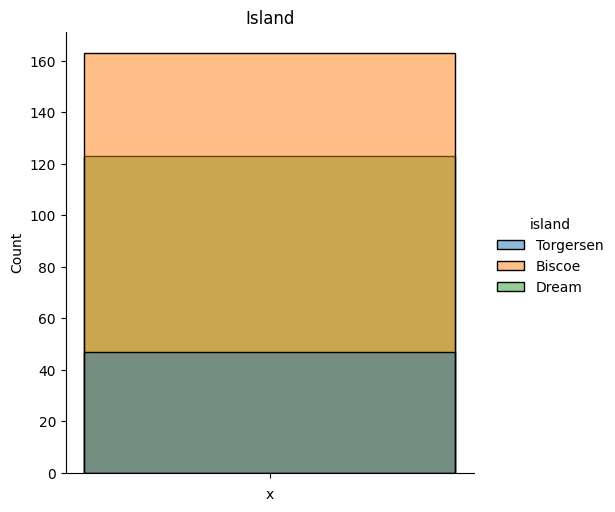

In [32]:
(
    p_df
    .assign(x='')
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                x='x',
                hue='island',
            )
        )
    )
)
plt.title('Island')
plt.show()